In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Confidence Intervals ##

Suppose you have a large i.i.d. sample. The CLT implies that with chance about 95%, the sample mean is within 2 SDs of the population mean.

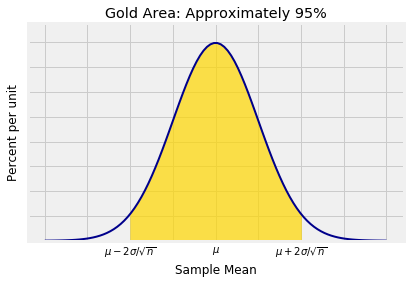

In [2]:
# HIDDEN
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, left_end=-2, right_end=2)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.xticks(np.arange(-4, 4.1),['','','$\mu - 2\sigma/\sqrt{n}$', '', '$\mu$', '', '$\mu+2\sigma/\sqrt{n}$',''])
plt.xlabel('Sample Mean')
plt.title('Gold Area: Approximately 95%');

This can be expressed in a different way:

- In about 95% of all samples, the sample mean is in the range *population mean $\pm ~ 2 \sigma/\sqrt{n}$*.

That is the same as saying:

- In about 95% of all samples, the population mean is in the range *sample mean $\pm ~ 2 \sigma/\sqrt{n}$*.

That is why the interval *sample mean $\pm ~ 2 \sigma/\sqrt{n}$* is used as an interval of estimates of $\mu$.

### Confidence Intervals for $\mu$ ###
The interval *sample mean $\pm ~ 2 \sigma/\sqrt{n}$* is called *an approximate 95% confidence interval for the parameter $\mu$*. The interval has a *confidence level* of 95%.

You could choose a different confidence level, say 80%. With that choice, you would expect the interval to be narrower. To find out exactly how many SDs you have to go on either side of the center to pick up a central area of about 80%, you have to find the corresponding $z$ on the standard normal curve, as shown below.

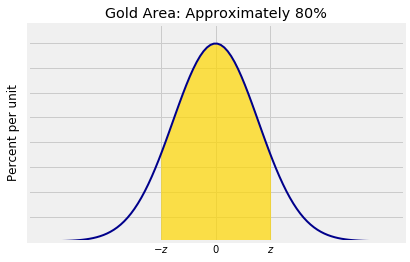

In [3]:
# HIDDEN
Plot_norm(x_limits=(-4, 4), mu=0, sigma=1, left_end=-1.28, right_end=1.28)
plt.yticks(np.arange(0, 0.401, 0.05), np.array(7*['']))
plt.xticks(make_array(-1.28, 0, 1.28),['$-z$', '0', '$z$'])
plt.title('Gold Area: Approximately 80%');

As you know from Data 8 and can see in the figure, the interval runs from the 10th to the 90th percentile of the distribution. So $z$ is the 90th percentile of the standard normal curve, also known as the "90 percent point" of the curve. The `scipy` method is therefore called `ppf` and takes a decimal value as its argument.

In [4]:
stats.norm.ppf(.9)

1.2815515655446004

Therefore an approximate 80% confidence interval for the population mean $\mu$ is given by "sample mean $\pm ~ 1.28\sigma/\sqrt{n}$".

Let's double check that 2 is a good choice of $z$ for a 95% interval. The $z$ that we need is the 97.5 percent point:

In [5]:
stats.norm.ppf(.975)

1.959963984540054

That's $z = 1.96$, which we have been calling 2. It's good enough, but $z = 1.96$ is also commonly used for constructing 95% confidence intervals.

### General Definition ###
Let $\lambda$ be any confidence level. Let $z_\lambda$ be the point such that the interval $(-z_\lambda, ~ z_\lambda)$ contains $\lambda$% of the area under the standard normal curve. In our example above, $\lambda$ was 80 and $z_\lambda$ was 1.28.

Then if $n$ is large,

$$
\frac{\lambda}{100} ~ \approx ~ 
P(\bar{X}_n \in \mu ~ \pm ~ z_\lambda \sigma/\sqrt{n}) ~ = ~
P(\mu \in \bar{X}_n ~ \pm ~ z_\lambda \sigma/\sqrt{n})
$$

The random interval $\bar{X}_n ~ \pm ~ z_\lambda \sigma/\sqrt{n}$ is called *an approximate $\lambda$% confidence interval for the population mean $\mu$*. There is about a $\lambda$% chance that this random interval contains the parameter $\mu$.

The only difference between confidence intervals of different levels is the choice of $z$ which depends on the level. The other two components are the sample mean and its SD.

### A Data 8 Example Revisited ###
Let's return to an example very familiar from Data 8: a random sample of 1,174 pairs of mothers and their newborns.

In [6]:
baby = Table.read_table('baby.csv')

In [7]:
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


The third column consists of the ages of the mothers. Let's construct an approximate 95% confidence interval for the mean age of mothers in the population. We did this in Data 8 using the bootstrap, so we will be able to compare results.

We can apply the methods of this section because our data come from a large random sample.

In [8]:
n = 1174
ages = baby.column('Maternal Age')

samp_mean = np.mean(ages)
samp_mean

27.228279386712096

The observed value of $\bar{X}_n$ in the sample is 27.23 years. We know that $n = 1174$, so all we need is the population SD $\sigma$ and then we can complete our calculation.

But of course we don't know the population SD $\sigma$.

So we estimate $\sigma$ by the SD of the data. There is some error in this estimate, of course, but it gets divided by $\sqrt{n}$ and therefore doesn't have much effect. Remember that our methods rely on the CLT and are only valid when $n$ is large.

The estimate of $\sigma$ is about 5.82 years.

In [9]:
sigma_estimate = np.std(ages)
sigma_estimate

5.8153604041908968

An approximate 95% confidence interval for the mean birth weight of babies in the population is $(26.89, 27.57)$ years.

In [10]:
samp_mean - 2*sigma_estimate/(n**0.5), samp_mean + 2*sigma_estimate/(n**0.5)

(26.888831911866099, 27.567726861558093)

No bootstrapping required! 

Now let's compare our interval to the interval we got in Data 8 by using the bootstrap percentile method. Here is the function `bootstrap_mean` from Data 8.

In [11]:
def bootstrap_mean(original_sample, label, replications):
    
    """Displays approximate 95% confidence interval for population mean.
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.column(label)
    n = len(just_one_column)
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = np.random.choice(just_one_column, size=n)
        resampled_mean = np.mean(bootstrap_sample)
        means = np.append(means, resampled_mean)
        
    left = percentile(2.5, means)
    right = percentile(97.5, means)
    
    resampled_means = Table().with_column(
    'Bootstrap Sample Mean', means
    )
    resampled_means.hist(bins=15)
    print('Approximate 95% confidence interval for population mean:')
    print(np.round(left, 2), 'to', np.round(right, 2))
    plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);

Let's construct a bootstrap 95% confidence interval for the population mean. We will use 5000 bootstrap samples as we did in Data 8.

Approximate 95% confidence interval for population mean:
26.9 to 27.57


/Users/dominiccroce/anaconda3/envs/textbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


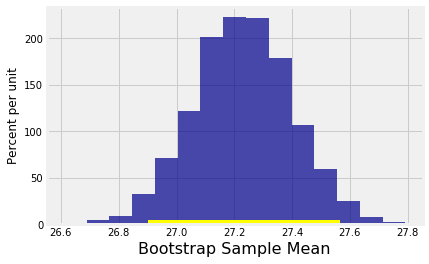

In [12]:
bootstrap_mean(baby, 'Maternal Age', 5000)

The bootstrap confidence interval is essentially identical to the interval (26.89, 27.57) that we got by using the normal approximation.

As we did in Data 8, let's observe that the distribution of maternal ages in the sample is far from normal:

/Users/dominiccroce/anaconda3/envs/textbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


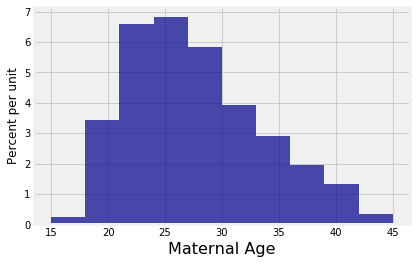

In [13]:
baby.select('Maternal Age').hist()

But the empirical distribution of the sample mean, displayed as the output of the previous cell, is roughly bell shaped. That is because the probability distribution of the mean of the large sample *is* approximately normal, by the Central Limit Theorem.